<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/ga01/GA01_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyompa #install latest version of pyompa

#the code below is for installing the development version of pyompa instead
#!pip uninstall -y pyompa
#%cd /content/
#!rm -rf pyompa
#!git clone https://github.com/nitrogenlab/pyompa
#%cd /content/pyompa
#!git checkout dev
#!git log -1
#!pip install .
#%cd /content/
#%reload_ext autoreload
#%autoreload 2
#from importlib import reload
#import pyompa
#reload(pyompa)

  Created wheel for pyompa: filename=pyompa-0.3.1.0-cp36-none-any.whl size=19075 sha256=27dd61d73dbdbcc31c4522f8410557a9eabae3e57d880ca347e0529fe4150d80
  Stored in directory: /root/.cache/pip/wheels/78/28/56/d247dddfdb776e608b40a3f29ef1ce1d9f1bcb4e984eac95e3
Successfully built pyompa


In [2]:
#upload the data files
!wget https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/ga01/ga01_endmembers.csv -O ga01_endmembers.csv
!wget https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/ga01/ga01_obs.csv -O ga01_obs.csv

--2021-02-01 00:33:01--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/ga01/ga01_endmembers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574 [text/plain]
Saving to: ‘ga01_endmembers.csv’

ga01_endmembers.csv 100%[===================>]     574  --.-KB/s    in 0s      

2021-02-01 00:33:01 (34.7 MB/s) - ‘ga01_endmembers.csv’ saved [574/574]

--2021-02-01 00:33:02--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/ga01/ga01_obs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2149

In [3]:
import pandas as pd
pd.read_csv("ga01_endmembers.csv")

,watermass_name,potential_temp,practical_salinity,silicate,nitrate,phosphate,oxygen
0,ENACW16,16.00,36.200,1.723311,0.0,0.00,257.04
1,ENACW12,12.30,35.660,1.233794,7.2,0.31,250.36
2,SAIW6,6.00,34.700,5.728544,13.2,0.86,283.58
3,SAIW4,4.50,34.800,1.333989,0.0,0.05,293.58
4,SPMW7,7.07,35.160,4.422143,13.7,1.06,272.00
5,SPMW8,8.00,35.230,1.986845,10.9,0.68,286.00
6,IrSPMW,5.00,35.014,5.966759,15.0,0.98,307.00
7,LSW,3.00,34.870,8.400000,16.5,1.05,283.00
8,MW,11.74,36.500,4.751455,10.9,0.70,210.00
9,ISOW,2.60,34.980,12.530811,15.5,1.20,276.00


In [4]:
config_file_contents = """

[endmember_penalties.DSOW.Depth]
type="depth_default"
lowerbound = 1700

[endmember_penalties.MW.Longitude]
type="latlon_default"
lowerbound = -30
upperbound = -10

[endmember_penalties.ENACW12.Depth]
type="depth_default"
upperbound = 1500

[endmember_penalties.ENACW16.Depth]
type="depth_default"
upperbound = 1500

[endmember_penalties.SPMW7.Depth]
type="depth_default"
upperbound = 2000

[endmember_penalties.SPMW8.Depth]
type="depth_default"
upperbound = 2000

[endmember_penalties.IrSPMW.Depth]
type="depth_default"
upperbound = 2000

[observations]
csv_file = "ga01_obs.csv"
na_values = -999

[endmembers]
csv_file = "ga01_endmembers.csv"
endmember_name_column = "watermass_name"

[params.potential_temp]
weight = 56.0
remineralized = false

[params.practical_salinity]
weight = 80.0
remineralized = false

[params.silicate]
weight = 3.0
remineralized = true
ratios = [0.08333333333]

[params.nitrate]
weight = 5.0
remineralized = true
ratios = [0.09523809523]

[params.oxygen]
weight = 1.0
remineralized = true
ratios = [-1]

[export]
csv_output_name="ompa_soln.csv"
orig_cols_to_include = ["Latitude", "Longitude", "Depth"]
export_orig_param_vals=true 
export_residuals=true 
export_endmember_fracs=true 
export_oxygen_deficit=true
export_conversion_ratios=true

"""

with open("config_file.txt", "w") as f:
  f.write(config_file_contents)


In [5]:
import pyompa
from pyompa import run_ompa_given_toml_config_file

#Find the ompa solution using the configuration file
ompa_soln = run_ompa_given_toml_config_file("config_file.txt")

Received Config:
{
    "endmember_penalties": {
        "DSOW": {
            "Depth": {
                "type": "depth_default",
                "lowerbound": 1700
            }
        },
        "MW": {
            "Longitude": {
                "type": "latlon_default",
                "lowerbound": -30,
                "upperbound": -10
            }
        },
        "ENACW12": {
            "Depth": {
                "type": "depth_default",
                "upperbound": 1500
            }
        },
        "ENACW16": {
            "Depth": {
                "type": "depth_default",
                "upperbound": 1500
            }
        },
        "SPMW7": {
            "Depth": {
                "type": "depth_default",
                "upperbound": 2000
            }
        },
        "SPMW8": {
            "Depth": {
                "type": "depth_default",
                "upperbound": 2000
            }
        },
        "IrSPMW": {
            "Depth": {
            

Plotting endmember usage penalties


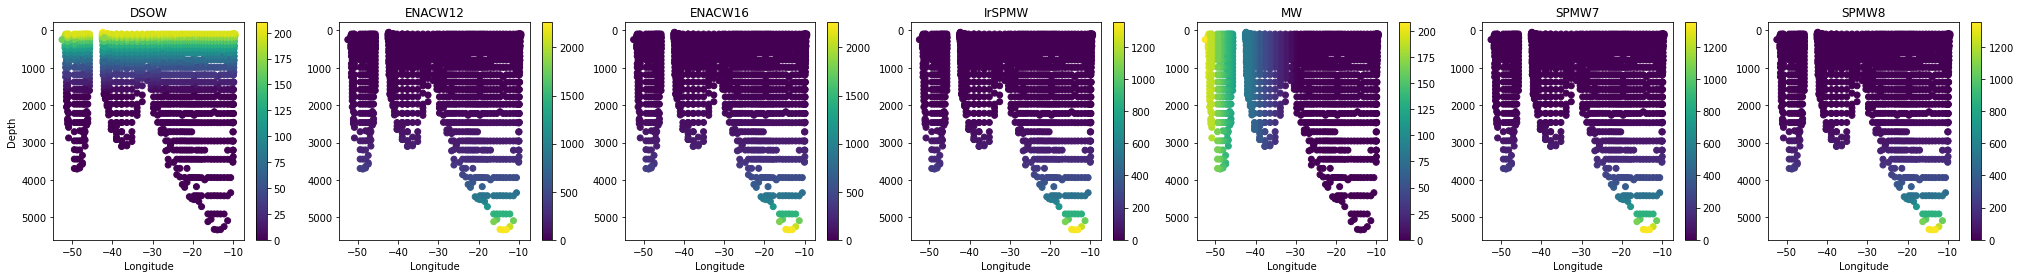

Plotting endmember fractions


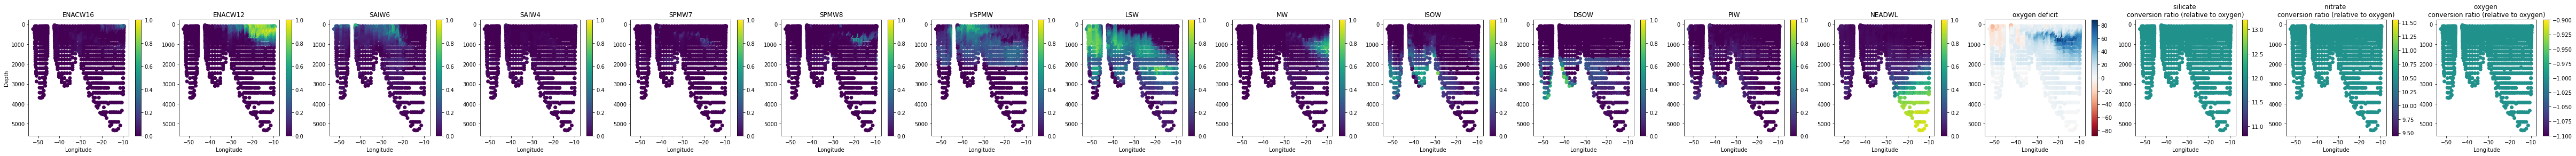

Plotting residuals


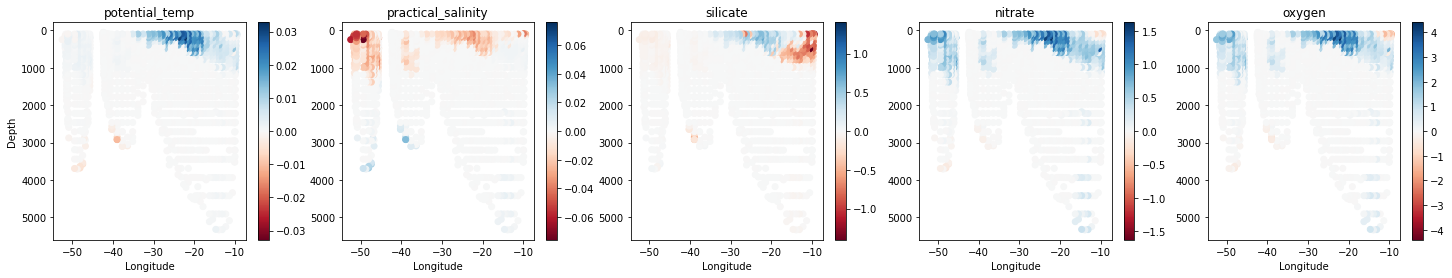

In [6]:
#Do some plotting
from pyompa import (plot_ompasoln_endmember_fractions,
                    plot_ompasoln_residuals,
                    plot_ompasoln_endmember_usagepenalties)

XAXIS_COLNAME = "Longitude"
YAXIS_COLNAME = "Depth"

if (len(ompa_soln.endmembername_to_usagepenalty) > 0):
    #plot usage penalties if applicable
    print("Plotting endmember usage penalties")
    plot_ompasoln_endmember_usagepenalties(
        ompa_soln, xaxis_colname=XAXIS_COLNAME,
        yaxis_colname=YAXIS_COLNAME)

print("Plotting endmember fractions")
plot_ompasoln_endmember_fractions(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                                  yaxis_colname=YAXIS_COLNAME)
print("Plotting residuals")
plot_ompasoln_residuals(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                        yaxis_colname=YAXIS_COLNAME)

In [7]:
from pyompa import build_altair_viz

#Build an interactive altair visualization
build_altair_viz(ompa_soln, xaxis_colname="Longitude", yaxis_colname="Depth" )

alt.VConcatChart(...)